# 图片识别、目标检测、风格迁移

## 人脸识别

人脸验证（face verification）和人脸识别（face recognition）的区别：
人脸验证：输入一张人脸图片，验证输出与模板是否为同一人，即一对一问题。
人脸识别：输入一张人脸图片，验证输出是否为K个模板中的某一个，即一对多问题。

One Shot Learning：数据库中每个人的训练样本只包含一张照片，然后训练一个CNN模型来进行人脸识别。若数据库有K个人，则CNN模型输出softmax层就是K维的。
问题：训练样本较少，CNN网络不够健壮；输出层不够灵活，数据库增加一个人，输出层就要发生变化，相当于重建网络架构。

相似函数：便是2张图片的相似程度，用d(img1,img2)来表示（越小越相似）。
应用：人脸验证中使用：

d(img1,img2)≤τ : 一样

d(img1,img2)>τ : 不一样

One Shot Learning的解决办法：计算测试图片与数据库中K个目标的相似函数，取其中d(img1,
img2)最小的目标为匹配对象。若所有的d(img1,img2)都很大，则表示数据库没有这个人。

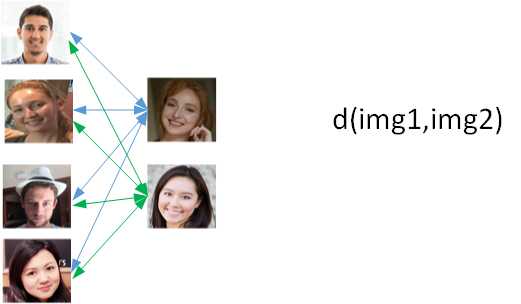

In [1]:
from IPython.display import Image
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "27.png", width=800, height=200)

Siamese Network：一张图片经过一般的CNN网络，最终得到的全连接层FC可以看做是原始图片的编码，表征了原始图片的关键信息，这个网络结构我们称之为Siamese network。每张图片经过Siamese network后，由FC层每个神经元来表征。

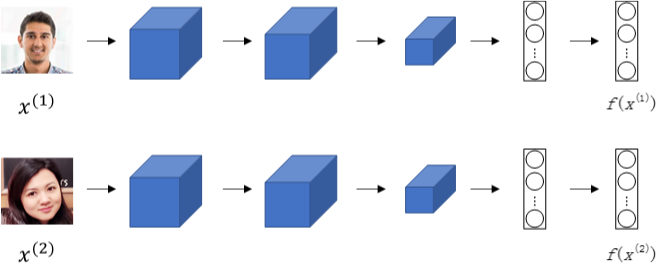

In [2]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "28.png", width=800, height=200)

上图中两张图片$x^{(1)}$$x^{(2)}$的相似程度看可由各自FC层$f(x^{(1)})$$f(x^{(2)})$之差来表示： 
$d(x^{(1)},x^{(2)}) = ||f(x^{(1)})-f(x^{(2)})||^2$

不同图片的CNN网络所有结构和参数都是一样的,我们的目标就是利用梯度下降算法，不断调整网络参数，使属于同一人的图片之间$d(x^{(1)},x^{(2)})$很小，不同人的图片之间$d(x^{(1)},x^{(2)})$很大。

Triplet Loss：损失函数，用于人脸识别的CNN模型。Triplet Loss需要每个样本包含三张图片：靶目标（Anchor）、正例（Positive）、反例（Negative），靶目标和正例是同一人，靶目标和反例不是同一人。Anchor和Positive组成一类样本，Anchor和Negative组成另外一类样本。简写 A,P,N.

目标：使构建的CNN网络输出编码f(A)接近f(P)，远离f(N)，数学上满足：

$||f(A)−f(P)||^2≤||f(A)−F(N)||^2$

添加一个超参数 $\alpha$ (边界范围>0):

$||f(A)−f(P)||^2-||f(A)−F(N)||^2 \leq -\alpha$ 

Loss function：$L(A,P,N)=max(||f(A)−f(P)||^2−||f(A)−F(N)||^2+α, 0)$

cost function：$J=∑_{i=1}^mL(A^{(i)},P^{(i)},N^{(i)})$

训练样本:必须保证同一人包含多张照片.

可以使用梯度下降算法，不断训练优化CNN网络参数，让J不断减小接近0。

A、P、N 的选择：人为选择A与P相差较大，A与N相差较小。即人为的增加难度和混淆度会让模型性能更好。

面部识别与二分类：将两个siamese网络组合在一起，将各自的编码层输出经过一个逻辑输出单元，该神经元使用sigmoid函数，输出1则表示识别为同一人，输出0则表示识别为不同人。结构如下：

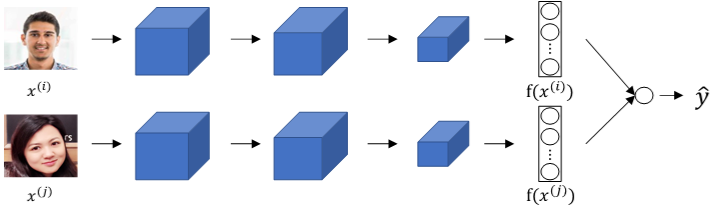

In [3]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "29.png", width=800, height=200)

每一个训练样本包含两张图片，每个siamese网络结构与参数完全相同。人脸识别问题转化为二分类问题。引入逻辑输出层参数w和b，输出y^表达式为：
$\hat y=σ(∑_{k=1}^Kw_k|f(x^{(i)})k−f(x^{(j)})k|+b)$ 
参数$w_k$和b都是通过梯度下降算法迭代训练得到。

χ方公式  ($\hat y$的另一种表达式) :$\hat y=σ(∑_{k=1}^Kw_k \frac{(f(x^{(i)})k−f(x^{(j)})k))^2}{f(x^{(i)})k+f(x^{(j)})k}+b)$


训练好网络之后，进行人脸识别的常规方法是测试图片与模板分别进行网络计算，编码层输出比较，计算逻辑输出单元。将每个模板的 f(x)保存下来，减少了计算量。

## 风格迁移

神经风格迁移应用：实现将一张图片的风格“迁移”到另外一张图片中，生成具有其特色的图片。

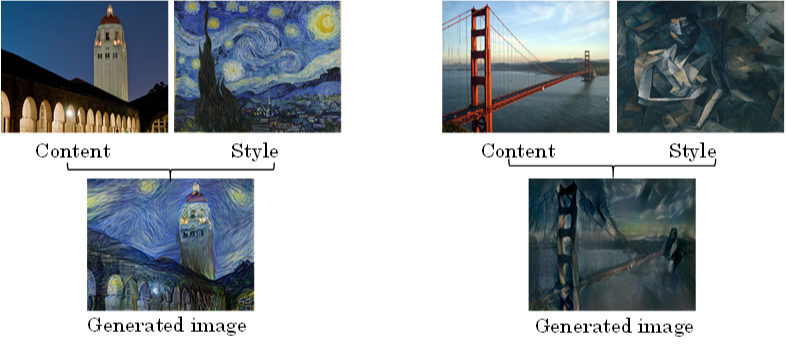

In [5]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "30.png", width=800, height=200)

##C表示内容图片，S表示风格图片，G表示生成图片。

神经风格迁移中卷积神经网络的每一层作用：
第一隐藏层：遍历所有样本，找出让该激活层函数输出最大的9块图像区域，然后找出不同的滤波器通道最大的的9块图像区域。一共找9次，得到一个9 x 9 的图像，其中每个3 x 3区域表示一个运算单元。

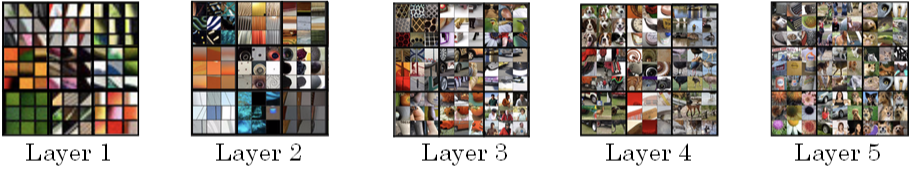

In [6]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "31.png", width=800, height=200)

由图可知：第一层隐藏层一般检测的是原始图像的边缘和颜色阴影等简单信息，，随着层数的增加，捕捉的区域更大，特征更加复杂，从边缘到纹理再到具体物体。

Cost Function：由两部分组成：C与G的相似程度和S与G的相似程度。

$J(G)=α⋅J_{content}(C,G)+β⋅J_{style}(S,G)$

基本算法流程是：首先令G为随机像素点，然后使用梯度下降算法，不断修正G的所有像素点，使得J(G)不断减小，从而使G逐渐有C的内容和G的风格.

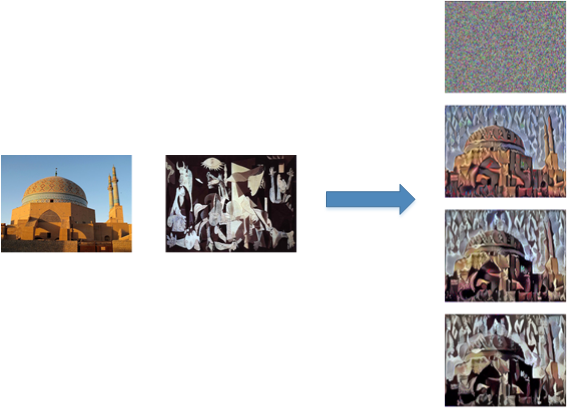

In [13]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "32.png", width=500, height=60)

$J_{content}(C,G)$ ： Content Cost Function（内容代价函数）：表示内容图片C与生成图片G之间的相似度。

C，S，G共用相同模型和参数。首先，需要选择合适的层数L来计算$J_content(C,G)$
CNN的每个隐藏层分别提取原始图片的不同深度特征，由简单到复杂。如果L太小，则G与C在像素上会非常接近，没有迁移效果；如果L太深，则G上某个区域将直接会出现C中的物体。因此，L既不能太浅也不能太深，一般选择网络中间层。

C和G在L层的激活函数输出$a^{[l](C)}a^{[l](C)}$与$a^{[l](G)}a^{[l](G)}$。相应的$J_{content(C,G)}$的表达式为：

$J_{content}(C,G)=\frac12||a^{[l](C)}−a^{[l](G)}||^2$

$a^{[l](C)}与a^{[l](G)}越相似，则J_{content}(C,G)越小$

$𝐽_{𝑠𝑡𝑦𝑙𝑒}(𝑆,𝐺)$: Style Cost Function:风格代价函数：图片的风格可以定义成第L层隐藏层不同通道间激活函数的乘积（相关性）。

风格说明：每个通道提取图片的特征不同，比如1通道提取的是图片的垂直纹理特征，2通道提取的是图片的橙色背景特征。那么计算这两个通道的相关性大小，相关性越大，表示原始图片及既包含了垂直纹理也包含了该橙色背景；相关性越小，表示原始图片并没有同时包含这两个特征。  表征了图片特征之间的联系。

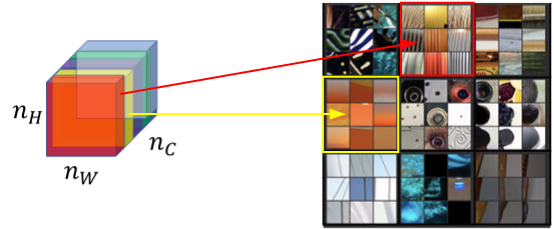

In [14]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "33.png", width=500, height=60)

$[L]$表示第L层隐藏层，k、k’分别表示不同通道，总共通道数为$n^{[l]}_C$。i，j分别表示该隐藏层的高度和宽度。风格矩阵$G^{[l]}_{kk`}$计算第L层隐藏层不同通道对应的所有激活函数输出和。$G^{[l]}{_kk′}的维度为n^{[l]}_c x n^{[l]}_c$。若两个通道之间相似性高，则对应的$G^{[l]}_{kk′}$较大；若两个通道之间相似性低，则对应的$G_{kk′}^{[l]}$较小。

风格矩阵：
$G^{[l]}_{kk′}=∑_{i=1}^{n^{[l]}_H}∑_{j=1}^{n^{[l]}_W}a^{[l]}_{ijk}a^{[l]}_{ijk′}$


风格矩阵$G^{[l](S)}_{kk′}$表征了风格图片S第ll层隐藏层的“风格”。相应地，生成图片G也有$G^{[l](G)}_{kk′}$。那么，$G^{[l][S]}_{kk′}$与$G^{[l][G]}_{kk′}$越相近，则表示G的风格越接近S。
$J_{𝑠𝑡𝑦𝑙𝑒}^{[l]}(𝑆,𝐺) = \frac1{(2n^{[l]}_Hn^{[l]}_Wn^{[l]}_C)}∑_{k=1}^{n^{[l]}_C}∑_{k′=1}^{n^{[l]}_C}||G^{[l][S]}_{kk′}-G^{[l][G]}_{kk′}||^2$

上述只是一个隐藏层，一般多个时：$J_{style}(S,G)=∑_lλ^{[l]}⋅J^{[l]}_{style}(S,G)$

一维到三维的推广：

一维：

输入时间序列维度：14 x 1

滤波器尺寸：5 x 1，滤波器个数：16

输出时间序列维度：10 x 16

二维：

输入图片维度：14 x 14 x 3

滤波器尺寸：5 x 5 x 3，滤波器个数：16

输出图片维度：10 x 10 x 16


三维：

输入3D图片维度：14 x 14 x 14 x 1

滤波器尺寸：5 x 5 x 5 x 1，滤波器个数：16

输出3D图片维度：10 x 10 x 10 x 16